In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os

def import_from_excel(e_file, filename):
    kinase_targets = e_file['kinase target'].tolist()
    JS_scores = e_file['JS Distance Score'].tolist()
    off_targets = e_file['off-target %inhibition values'].tolist()
    mu = int(filename.split('.')[0].split('_')[-1])
    return [mu, kinase_targets, JS_scores, off_targets]

test_results_200 = []
test_results_700 = []

for filename in os.listdir(os.getcwd()+'/Klaeger/results/'):
    f = './Klaeger/results/'+str(filename)
    replicate_results = []
    for x in range(1,6):
        open_file = pd.read_excel(f, str(x))
        inhibitor_combination = import_from_excel(open_file, filename)
        replicate_results.append((x,inhibitor_combination))
    if replicate_results[0][1][0] == 200:
        test_results_200.append(replicate_results)
    elif replicate_results[0][1][0] == 700:
        test_results_700.append(replicate_results)
        
PKIS2_data=pd.read_excel("./Klaeger/010621_Klaeger_correct_table.xlsx")
all_kinase_names = list(PKIS2_data.columns.values)[7:]
        
#check to make sure we have 5 sets of results for each       
print(len(test_results_200))
print(len(test_results_700))

5
5


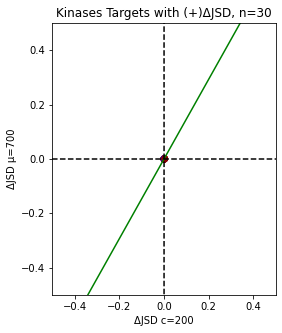

In [2]:
#check to see what the maximum inhibitor concentration # is that we should use
import matplotlib.patches as mpatches
max_inhib_num = len(test_results_200[0])

#for each kinase, get the set of scores at i=1, i=2, i=3 etc

organized_results_200 = {}
organized_results_700 = {}

for replicate_200 in test_results_200:    #in each of the 5 test replicates
    for individual_result in replicate_200:    #for each combination
        inhibitor_combination_number = individual_result[0]     
        k_names = individual_result[1][1]
        JS_scores = individual_result[1][2]
        for i in range(0, len(k_names)):
            if k_names[i] not in organized_results_200:
                organized_results_200[k_names[i]] = [[] for x in range(0,max_inhib_num)]
            organized_results_200[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])
            
for replicate_700 in test_results_700:    #in each of the 5 test replicates
    for individual_result in replicate_700:    #for each combination
        inhibitor_combination_number = individual_result[0]     
        k_names = individual_result[1][1]
        JS_scores = individual_result[1][2]
        for i in range(0, len(k_names)):
            if k_names[i] not in organized_results_700:
                organized_results_700[k_names[i]] = [[] for x in range(0,max_inhib_num)]
            organized_results_700[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])

#determine which condition has the maximum mean score, what the difference is from the i=1 mean score, 
#and if that difference is significant or not

x_200_scored_kinase_names = []
x_200_values = []
x_sig = []
max_200_vals = []

y_700_scored_kinase_names = []
y_700_values = []
y_sig = []
max_700_vals = []

for kinase in organized_results_200:
    #get the i=1 conition
    i1_mean = np.mean(organized_results_200[kinase][0])
    i1_values = organized_results_200[kinase][0]
    max_other_combination = 0
    max_other_combination_values = []
    significant = 0
    #compare to higher combination #s
    for j in range(1, max_inhib_num):
        if organized_results_200[kinase][j] != []:
            i_combo_mean = np.mean(organized_results_200[kinase][j])
            if i_combo_mean > max_other_combination:
                max_other_combination = i_combo_mean
                max_other_combination_values = organized_results_200[kinase][j]
    max_200_vals.append(max_other_combination)
    #is the difference significant?
    tval, pval = stats.ttest_ind(i1_values, max_other_combination_values)
    if (pval < 0.05) and (np.mean(max_other_combination_values) > (i1_mean)):
        significant = 1
    JS_score_difference = max_other_combination - i1_mean
    x_200_scored_kinase_names.append(kinase)
    x_200_values.append(JS_score_difference)
    x_sig.append(significant)
    
for kinase in organized_results_700:
    #get the i=1 conition
    i1_mean = np.mean(organized_results_700[kinase][0])
    i1_values = organized_results_700[kinase][0]
    max_other_combination = 0
    max_other_combination_values = []
    significant = 0
    #compare to higher combination #s
    for j in range(1, max_inhib_num):
        if organized_results_700[kinase][j] != []:
            i_combo_mean = np.mean(organized_results_700[kinase][j])
            if i_combo_mean > max_other_combination:
                max_other_combination = i_combo_mean
                max_other_combination_values = organized_results_700[kinase][j]
    max_700_vals.append(max_other_combination)
    #is the difference significant?
    tval, pval = stats.ttest_ind(i1_values, max_other_combination_values)
    if (pval < 0.05) and (np.mean(max_other_combination_values) > (i1_mean)):
        significant = 2
    JS_score_difference = max_other_combination - i1_mean
    y_700_scored_kinase_names.append(kinase)
    y_700_values.append(JS_score_difference)
    y_sig.append(significant)
    
#for each kinase in PKIS2, get the x_val, the y_val, the total significance

final_kinases = []
final_x = []
final_y = []
sum_sig = []

for kinase_target in all_kinase_names:
    #final_kinases.append(kinase_target)
    
    add = False
    x_index = None
    y_index = None
    
    if kinase_target in x_200_scored_kinase_names:
        x_index = x_200_scored_kinase_names.index(kinase_target)
        #final_x.append(x_200_values[x_index])
        if x_sig[x_index] > 0:
            add=True
        #sum_sig.append(x_sig[index])
    #else:
        #final_x.append(0)
        #sum_sig.append(0)
    if kinase_target in y_700_scored_kinase_names:
        y_index = y_700_scored_kinase_names.index(kinase_target)
        if y_sig[y_index] > 0:
            add = True
        #final_y.append(y_700_values[index])
        #sum_sig[-1] = sum_sig[-1] + y_sig[index]
    #else:
        #final_y.append(0)
    if add:
        final_x.append(x_200_values[x_index])
        final_y.append(y_700_values[y_index])
        sum_sig.append(x_sig[x_index]+y_sig[y_index])
        final_kinases.append(kinase_target)

#convert significane to a different color for the points
#black = not significant
#yellow = significant for 200 (1)
#blue = significant for 700 (2)
#cyan = significant for both (3)
point_color = []
total = 0
for value in sum_sig:
    if value == 1:
        point_color.append('darkred')
        total+=1
    elif value == 2:
        point_color.append('b')
        total+=1
    elif value == 3:
        point_color.append('darkorange')
        total+=1
    else:
        point_color.append('k')
       
fig = plt.figure(figsize=(4, 5))
plt.scatter(final_x, final_y, c=point_color)
#total = 0
#for i, label in enumerate(final_kinases):
    #if final_x[i] > 0.025 or final_y[i] > (0.025*1.8): 
        #plt.annotate(label, (final_x[i], final_y[i]))
#    if final_x[i] > 0 or final_y[i] >0:
#        total += 1
plt.xlim((-0.5,0.5))
plt.ylim((-0.5,0.5))
plt.xlabel('ΔJSD c=200')
plt.ylabel('ΔJSD μ=700')
title = 'Kinases Targets with (+)ΔJSD, n=' + str(total)
plt.title(title)

#finally, add a line that represents an equal improvement to the maximum of 1 in both scales
#the 1 - average max(JSD at i=1) at mu=700 / 1 - average max(JSD at i=1) at mu=200, gives the slope
#essentially, its a scaled measure of how much improvement in the score is possible relative to a maximum of 1.
#note - since it represents the average change, it is possible for some points to represent statistically significant change on one axis but NOT the other

mu700 = [] #the i=1 scores
mu200 = [] #the i=1 scores
for kinase in organized_results_700:
    mu700.append(np.mean(organized_results_700[kinase][0]))
for kinase in organized_results_200:
    mu200.append(np.mean(organized_results_200[kinase][0]))
slope = (1 - np.mean(mu700)) / (1 - np.mean(mu200))
xv = np.arange(-1,1,0.001)
yv = xv*slope

zeros = xv*0

plt.plot(xv,yv,color='g')

plt.plot(xv,zeros,'k--')
plt.plot(zeros,yv,'k--')

plt.show()

#fig.savefig("010821_JSD_700v200_Klaeger_only-pval-05_scatterplot.pdf", bbox_inches='tight',dpi=1000)

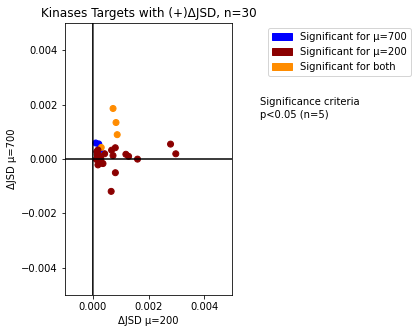

In [3]:
#replot with tighter axis

fig = plt.figure(figsize=(3, 5))

mu700 = [] #the i=1 scores
mu200 = [] #the i=1 scores
for kinase in organized_results_700:
    mu700.append(np.mean(organized_results_700[kinase][0]))
for kinase in organized_results_200:
    mu200.append(np.mean(organized_results_200[kinase][0]))
slope = (1 - np.mean(mu700)) / (1 - np.mean(mu200))
xv = np.arange(-1,1,0.001)
yv = xv*slope

zeros = xv*0

#plt.plot(xv,yv,color='g')

plt.plot(xv,zeros,'k-')
plt.plot(zeros,yv,'k-')

plt.scatter(final_x, final_y, c=point_color)
#total = 0
#for i, label in enumerate(final_kinases):
    #if final_x[i] > 0.025 or final_y[i] > (0.025*1.8): 
    #plt.annotate(label, (final_x[i], final_y[i]))
#    if final_x[i] > 0 or final_y[i] >0:
#        total += 1
plt.xlim((-0.001,0.005))
plt.ylim((-0.005,0.005))
plt.xlabel('ΔJSD μ=200')
plt.ylabel('ΔJSD μ=700')
title = 'Kinases Targets with (+)ΔJSD, n=' + str(total)
plt.title(title)

#finally, add a line that represents an equal improvement to the maximum of 1 in both scales
#the 1 - average max(JSD at i=1) at mu=700 / 1 - average max(JSD at i=1) at mu=200, gives the slope
#essentially, its a scaled measure of how much improvement in the score is possible relative to a maximum of 1.
#note - since it represents the average change, it is possible for some points to represent statistically significant change on one axis but NOT the other
u700ldg = mpatches.Patch(color='b', label='Significant for μ=700')
u200ldg = mpatches.Patch(color='darkred', label='Significant for μ=200')
bothldg = mpatches.Patch(color='darkorange', label='Significant for both')

fig.legend(handles=[u700ldg, u200ldg, bothldg],bbox_to_anchor=(1.75, 0.88))

#plt.text(-0.001,0.002,'n=10', color='b')
#plt.text(0.0025,-0.002,'n=23', color='darkred')
#plt.text(0.0025,0.002,'n=7', color='darkorange')

plt.text(0.006,0.002,'Significance criteria')
plt.text(0.006,0.0015,'p<0.05 (n=5)')

plt.show()

In [4]:
#Who are the kinases that showed statistically significant improvement?

print('average 200 i=1 score:' + str(np.mean(mu200)))
print('average 700 i=1 score:' + str(np.mean(mu700)))


n700 = 0
n200 = 0
both = 0

res = []
for i in range(0, len(final_kinases)):
    k = final_kinases[i]
    mu200 = final_x[i]
    mu700 = final_y[i]
    tscore = mu200+mu700
    if mu200 == 0:
        mu200 = 'N/A'
    if mu700 == 0:
        mu700 = 'N/A'
    sig = sum_sig[i]
    if sig>=1:
        res.append((tscore,k,mu200,mu700))
        if sig == 1:
            n200 += 1
        if sig == 2:
            n700 += 1
        if sig == 3:
            both += 1
print(n700,n200,both)
res = sorted(res, key=lambda x: x[0], reverse=True)
print('kinase','ΔJSD_μ=200','ΔJSD_μ=700')
counter = 1
for k in res:
    print(counter,k[1],k[2],k[3])
    counter+=1
    

average 200 i=1 score:0.95244529054649
average 700 i=1 score:0.9303236504247375
3 23 4
kinase ΔJSD_μ=200 ΔJSD_μ=700
1 EPHA5 0.0027848268400536558 0.0005438736144492973
2 BCR 0.00297258438954473 0.00018785727039283273
3 CDK17 0.0007239111654454566 0.0018549945616289643
4 TYK2 0.0008303979655563953 0.0013386485054234232
5 ACVR1 0.0008728006676718136 0.0008920556851703676
6 PDPK1;PDPK2P 0.001600975334814625 -8.22415884194072e-06
7 PRKCD 0.0012812240921558082 9.404245012145651e-05
8 PRKD2 0.0011835370709115667 0.00016993864375824952
9 FYN 0.0008044239455659019 0.0004105408791472698
10 PLK4 0.0006716668416461014 0.0003209469425797806
11 CLK1 0.0007230512927086652 0.00012376619199372385
12 GSK3A 0.00021179548767880085 0.0005502022816123997
13 DDR1 0.00030041423934079603 0.00042033396320462213
14 SIK3 0.00010305232692608968 0.0005845278711215096
15 CCNT2 0.0004222655893331151 0.00019002468075901557
16 CSNK2B 0.00024969117826034726 0.0003426031233934035
17 RIPK2 0.00018275772782361255 0.000328

In [5]:
##################################################
##################################################
##################################################
##################################################
##################################################
##################################################
##################################################
##################################################
##################################################
##################################################
##################################################
##################################################
##################################################

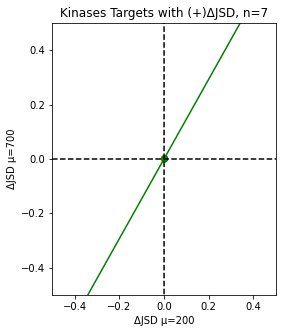

In [6]:
##################################################

# Same as above but set a threshold for changes that are more relevant versus less relevant
# Count the number of kinases that fall over this threshold

#check to see what the maximum inhibitor concentration # is that we should use
max_inhib_num = len(test_results_200[0])

#for each kinase, get the set of scores at i=1, i=2, i=3 etc

organized_results_200 = {}
organized_results_700 = {}

off_target_values_200 = {}
off_target_values_700 = {}

for replicate_200 in test_results_200:    #in each of the 5 test replicates
    for individual_result in replicate_200:    #for each combination
        inhibitor_combination_number = individual_result[0]     
        k_names = individual_result[1][1]
        JS_scores = individual_result[1][2]
        off_target_values = individual_result[1][3]
        for i in range(0, len(k_names)):
            if k_names[i] not in organized_results_200:
                organized_results_200[k_names[i]] = [[] for x in range(0,max_inhib_num)]
                off_target_values_200[k_names[i]] = [[] for x in range(0,max_inhib_num)]
            organized_results_200[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])
            off_target_values_200[k_names[i]][inhibitor_combination_number-1].append(off_target_values[i])
            
for replicate_700 in test_results_700:    #in each of the 5 test replicates
    for individual_result in replicate_700:    #for each combination
        inhibitor_combination_number = individual_result[0]     
        k_names = individual_result[1][1]
        JS_scores = individual_result[1][2]
        off_target_values = individual_result[1][3]
        for i in range(0, len(k_names)):
            if k_names[i] not in organized_results_700:
                organized_results_700[k_names[i]] = [[] for x in range(0,max_inhib_num)]
                off_target_values_700[k_names[i]] = [[] for x in range(0,max_inhib_num)]
            organized_results_700[k_names[i]][inhibitor_combination_number-1].append(JS_scores[i])
            off_target_values_700[k_names[i]][inhibitor_combination_number-1].append(off_target_values[i])

#determine which condition has the maximum mean score, what the difference is from the i=1 mean score, 
#and if that difference is significant or not

x_200_scored_kinase_names = []
x_200_values = []
x_sig = []
max_200_vals = []
stdevs_200 = [] #the std of the differences from i=1 to i>1 if i>1 is greater
JSD_200_i1_scores = [] #the raw scores
JSD_200_max_scores = [] #the raw scores
off_target_values_u200 = []
off_target_values_i1_u200 = []

y_700_scored_kinase_names = []
y_700_values = []
y_sig = []
max_700_vals = []
stdevs_700 = [] #the std of the differences from i=1 to i>1 if i>1 is greater
JSD_700_i1_scores = [] #the raw scores
JSD_700_max_scores = [] #the raw scores
off_target_values_u700 = []
off_target_values_i1_u700 = []

for kinase in organized_results_200:
    #get the i=1 conition
    i1_mean = np.mean(organized_results_200[kinase][0])
    i1_values = organized_results_200[kinase][0]
    max_other_combination = 0
    max_other_combination_values = []
    significant = 0
    best_combination_number = None
    #compare to higher combination #s
    for j in range(1, max_inhib_num):
        if organized_results_200[kinase][j] != []:
            i_combo_mean = np.mean(organized_results_200[kinase][j])
            if i_combo_mean > max_other_combination:
                max_other_combination = i_combo_mean
                max_other_combination_values = organized_results_200[kinase][j]
                best_combination_number = j+1
    if max_other_combination_values != []:
        max_200_vals.append(max_other_combination)
        differences = [max_other_combination_values[x] - i1_values[x] for x in range(0,len(i1_values))]
        stdev = np.std(differences)
        stdevs_200.append(stdev)
        #is the difference significant?
        tval, pval = stats.ttest_ind(i1_values, max_other_combination_values)
        if (pval < 0.05) and (np.mean(max_other_combination_values) > (i1_mean + 0.001)):
            significant = 1
        JS_score_difference = max_other_combination - i1_mean
        x_200_scored_kinase_names.append(kinase)
        x_200_values.append(JS_score_difference)
        x_sig.append(significant)
        JSD_200_i1_scores.append(i1_values)
        JSD_200_max_scores.append(max_other_combination_values)
        off_target_values_u200.append(off_target_values_200[kinase][best_combination_number-1]) #due to 0 indexing
        off_target_values_i1_u200.append(off_target_values_200[kinase][0])
    
for kinase in organized_results_700:
    #get the i=1 conition
    i1_mean = np.mean(organized_results_700[kinase][0])
    i1_values = organized_results_700[kinase][0]
    max_other_combination = 0
    max_other_combination_values = []
    significant = 0
    best_combination_number = None
    #compare to higher combination #s
    for j in range(1, max_inhib_num):
        if organized_results_700[kinase][j] != []:
            i_combo_mean = np.mean(organized_results_700[kinase][j])
            if i_combo_mean > max_other_combination:
                max_other_combination = i_combo_mean
                max_other_combination_values = organized_results_700[kinase][j]
                best_combination_number = j+1
    if max_other_combination_values != []:
        max_700_vals.append(max_other_combination)
        differences = [max_other_combination_values[x] - i1_values[x] for x in range(0,len(i1_values))]
        stdev = np.std(differences)
        stdevs_700.append(stdev)
        #is the difference significant?
        tval, pval = stats.ttest_ind(i1_values, max_other_combination_values)
        if (pval < 0.05) and (np.mean(max_other_combination_values) > (i1_mean + 0.001)):
            significant = 2
        JS_score_difference = max_other_combination - i1_mean
        y_700_scored_kinase_names.append(kinase)
        y_700_values.append(JS_score_difference)
        y_sig.append(significant)
        JSD_700_i1_scores.append(i1_values)
        JSD_700_max_scores.append(max_other_combination_values)
        off_target_values_u700.append(off_target_values_700[kinase][best_combination_number-1]) #due to 0 indexing
        off_target_values_i1_u700.append(off_target_values_700[kinase][0])
        
#for each kinase in PKIS2, get the x_val, the y_val, the total significance

final_kinases = []
final_x = []
final_y = []
sum_sig = []

final_std_200 = []
final_std_700 = []

final_JSD_200_i1 = []
final_JSD_700_i1 = []
final_JSD_200_max = []
final_JSD_700_max = []

final_JSD_200_i1_stdev = []
final_JSD_700_i1_stdev = []
final_JSD_200_max_stdev = []
final_JSD_700_max_stdev = []

final_200_off_target_values = []
final_700_off_target_values = []

final_i1_200_off_target_values = []
final_i1_700_off_target_values = []

for kinase_target in all_kinase_names:
    #final_kinases.append(kinase_target)
    
    add = False
    x_index = None
    y_index = None
    
    if kinase_target in x_200_scored_kinase_names:
        x_index = x_200_scored_kinase_names.index(kinase_target)
        #final_x.append(x_200_values[x_index])
        if x_sig[x_index] > 0:
            add=True
        #sum_sig.append(x_sig[index])
    #else:
        #final_x.append(0)
        #sum_sig.append(0)
    if kinase_target in y_700_scored_kinase_names:
        y_index = y_700_scored_kinase_names.index(kinase_target)
        if y_sig[y_index] > 0:
            add = True
        #final_y.append(y_700_values[index])
        #sum_sig[-1] = sum_sig[-1] + y_sig[index]
    #else:
        #final_y.append(0)
    if add:
        final_x.append(x_200_values[x_index])
        final_y.append(y_700_values[y_index])
        sum_sig.append(x_sig[x_index]+y_sig[y_index])
        final_kinases.append(kinase_target)
        final_std_700.append(stdevs_700[y_index]) # the std of the differences in score
        final_std_200.append(stdevs_200[x_index]) #the std off the differences in score
        
        final_JSD_200_i1.append(np.mean(JSD_200_i1_scores[x_index]))
        final_JSD_200_max.append(np.mean(JSD_200_max_scores[x_index]))
        final_JSD_200_i1_stdev.append(np.std(JSD_200_i1_scores[x_index]))
        final_JSD_200_max_stdev.append(np.std(JSD_200_max_scores[x_index]))
        
        final_JSD_700_i1.append(np.mean(JSD_700_i1_scores[y_index]))
        final_JSD_700_max.append(np.mean(JSD_700_max_scores[y_index]))
        final_JSD_700_i1_stdev.append(np.std(JSD_700_i1_scores[y_index]))
        final_JSD_700_max_stdev.append(np.std(JSD_700_max_scores[y_index]))
        
        final_200_off_target_values.append(off_target_values_u200[x_index])
        final_700_off_target_values.append(off_target_values_u700[y_index])
        
        final_i1_200_off_target_values.append(off_target_values_i1_u200[x_index])
        final_i1_700_off_target_values.append(off_target_values_i1_u700[y_index])
        
#convert significane to a different color for the points
#black = not significant
#yellow = significant for 200 (1)
#blue = significant for 700 (2)
#cyan = significant for both (3)
point_color = []
total = 0
for value in sum_sig:
    if value == 1:
        point_color.append('green')
        total+=1
    elif value == 2:
        point_color.append('orange')
        total+=1
    elif value == 3:
        point_color.append('steelblue')
        total+=1
    else:
        point_color.append('k')
       
fig = plt.figure(figsize=(4, 5))
plt.scatter(final_x, final_y, c=point_color)
#total = 0
#for i, label in enumerate(final_kinases):
    #if final_x[i] > 0.025 or final_y[i] > (0.025*1.8): 
        #plt.annotate(label, (final_x[i], final_y[i]))
#    if final_x[i] > 0 or final_y[i] >0:
#        total += 1
plt.xlim((-0.5,0.5))
plt.ylim((-0.5,0.5))
plt.xlabel('ΔJSD μ=200')
plt.ylabel('ΔJSD μ=700')
title = 'Kinases Targets with (+)ΔJSD, n=' + str(total)
plt.title(title)

#finally, add a line that represents an equal improvement to the maximum of 1 in both scales
#the 1 - average max(JSD at i=1) at mu=700 / 1 - average max(JSD at i=1) at mu=200, gives the slope
#essentially, its a scaled measure of how much improvement in the score is possible relative to a maximum of 1.
#note - since it represents the average change, it is possible for some points to represent statistically significant change on one axis but NOT the other

mu700 = [] #the i=1 scores
mu200 = [] #the i=1 scores
for kinase in organized_results_700:
    mu700.append(np.mean(organized_results_700[kinase][0]))
for kinase in organized_results_200:
    mu200.append(np.mean(organized_results_200[kinase][0]))
slope = (1 - np.mean(mu700)) / (1 - np.mean(mu200))
xv = np.arange(-1,1,0.001)
yv = xv*slope

zeros = xv*0

plt.plot(xv,yv,color='g')

plt.plot(xv,zeros,'k--')
plt.plot(zeros,yv,'k--')

plt.show()

#fig.savefig("120121_PKIS2_JSD_700v200_scatterplot.pdf", bbox_inches='tight',dpi=500)

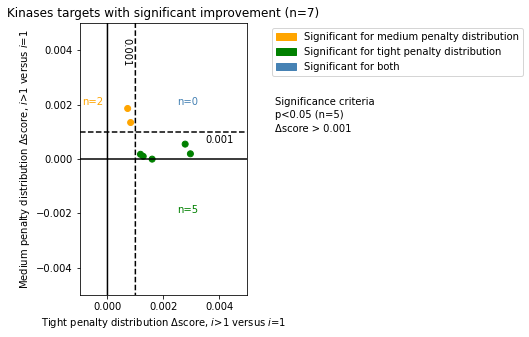

In [7]:
#replot with tighter axis
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(3, 5))

mu700 = [] #the i=1 scores
mu200 = [] #the i=1 scores
for kinase in organized_results_700:
    mu700.append(np.mean(organized_results_700[kinase][0]))
for kinase in organized_results_200:
    mu200.append(np.mean(organized_results_200[kinase][0]))
slope = (1 - np.mean(mu700)) / (1 - np.mean(mu200))
xv = np.arange(-1,1,0.001)
yv = xv*slope

zeros = xv*0

#plt.plot(xv,yv,color='g')

plt.plot(xv,zeros,'k-')
plt.plot(zeros,yv,'k-')

threshlimit = np.arange(-1,1,0.0001)
tlim = [0.001]*len(threshlimit)

plt.plot(threshlimit,tlim,'--',color='k')
plt.plot(tlim,threshlimit,'--',color='k')

plt.scatter(final_x, final_y, c=point_color)
#total = 0
#for i, label in enumerate(final_kinases):
    #if final_x[i] > 0.025 or final_y[i] > (0.025*1.8): 
    #plt.annotate(label, (final_x[i], final_y[i]))
#    if final_x[i] > 0 or final_y[i] >0:
#        total += 1
plt.xlim((-0.001,0.005))
plt.ylim((-0.005,0.005))
plt.xlabel('Tight penalty distribution Δscore, $\mathregular{\mathit{i}}$>1 versus $\mathregular{\mathit{i}}$=1')
plt.ylabel('Medium penalty distribution Δscore, $\mathregular{\mathit{i}}$>1 versus $\mathregular{\mathit{i}}$=1')
title = 'Kinases targets with significant improvement (n=' + str(total)+')'
plt.title(title)

#finally, add a line that represents an equal improvement to the maximum of 1 in both scales
#the 1 - average max(JSD at i=1) at mu=700 / 1 - average max(JSD at i=1) at mu=200, gives the slope
#essentially, its a scaled measure of how much improvement in the score is possible relative to a maximum of 1.
#note - since it represents the average change, it is possible for some points to represent statistically significant change on one axis but NOT the other
u700ldg = mpatches.Patch(color='orange', label='Significant for medium penalty distribution')
u200ldg = mpatches.Patch(color='green', label='Significant for tight penalty distribution')
bothldg = mpatches.Patch(color='steelblue', label='Significant for both')

fig.legend(handles=[u700ldg, u200ldg, bothldg],bbox_to_anchor=(2.2, 0.88))

plt.text(0.0035,0.0006,'0.001', color='k')
plt.text(0.0005,0.0035,'0.001', color='k',rotation=-90)

plt.text(-0.0009,0.002,'n=2', color='orange')
plt.text(0.0025,-0.002,'n=5', color='green')
plt.text(0.0025,0.002,'n=0', color='steelblue')

plt.text(0.006,0.002,'Significance criteria')
plt.text(0.006,0.0015,'p<0.05 (n=5)')
plt.text(0.006,0.001,'Δscore > 0.001')

plt.show()

#fig.savefig("012522_Klaeger_JSD_700v200_scatterplot_zoomin-color-hange.pdf", bbox_inches='tight',dpi=1000)

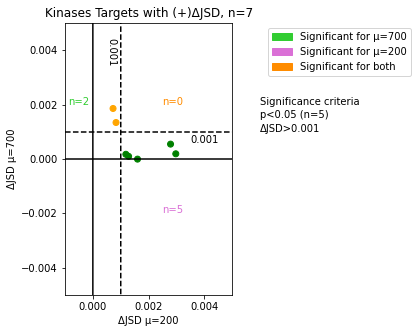

In [8]:
#replot with tighter axis
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(3, 5))

mu700 = [] #the i=1 scores
mu200 = [] #the i=1 scores
for kinase in organized_results_700:
    mu700.append(np.mean(organized_results_700[kinase][0]))
for kinase in organized_results_200:
    mu200.append(np.mean(organized_results_200[kinase][0]))
slope = (1 - np.mean(mu700)) / (1 - np.mean(mu200))
xv = np.arange(-1,1,0.001)
yv = xv*slope

zeros = xv*0

#plt.plot(xv,yv,color='g')

plt.plot(xv,zeros,'k-')
plt.plot(zeros,yv,'k-')

threshlimit = np.arange(-1,1,0.0001)
tlim = [0.001]*len(threshlimit)

plt.plot(threshlimit,tlim,'--',color='k')
plt.plot(tlim,threshlimit,'--',color='k')

plt.scatter(final_x, final_y, c=point_color)
#total = 0
#for i, label in enumerate(final_kinases):
    #if final_x[i] > 0.025 or final_y[i] > (0.025*1.8): 
    #plt.annotate(label, (final_x[i], final_y[i]))
#    if final_x[i] > 0 or final_y[i] >0:
#        total += 1
plt.xlim((-0.001,0.005))
plt.ylim((-0.005,0.005))
plt.xlabel('ΔJSD μ=200')
plt.ylabel('ΔJSD μ=700')
title = 'Kinases Targets with (+)ΔJSD, n=' + str(total)
plt.title(title)

#finally, add a line that represents an equal improvement to the maximum of 1 in both scales
#the 1 - average max(JSD at i=1) at mu=700 / 1 - average max(JSD at i=1) at mu=200, gives the slope
#essentially, its a scaled measure of how much improvement in the score is possible relative to a maximum of 1.
#note - since it represents the average change, it is possible for some points to represent statistically significant change on one axis but NOT the other
u700ldg = mpatches.Patch(color='limegreen', label='Significant for μ=700')
u200ldg = mpatches.Patch(color='orchid', label='Significant for μ=200')
bothldg = mpatches.Patch(color='darkorange', label='Significant for both')

fig.legend(handles=[u700ldg, u200ldg, bothldg],bbox_to_anchor=(1.75, 0.88))

plt.text(0.0035,0.0006,'0.001', color='k')
plt.text(0.0005,0.0035,'0.001', color='k',rotation=-90)

plt.text(-0.0009,0.002,'n=2', color='limegreen')
plt.text(0.0025,-0.002,'n=5', color='orchid')
plt.text(0.0025,0.002,'n=0', color='darkorange')

plt.text(0.006,0.002,'Significance criteria')
plt.text(0.006,0.0015,'p<0.05 (n=5)')
plt.text(0.006,0.001,'ΔJSD>0.001')

plt.show()

#fig.savefig("011322_Klaeger_JSD_700v200_scatterplot.pdf", bbox_inches='tight',dpi=1000)

average 200 i=1 score:0.0027848268400536558
average 700 i=1 score:0.0005438736144492973
2 5 0
kinase ΔJSD_μ=200 ΔJSD_μ=700


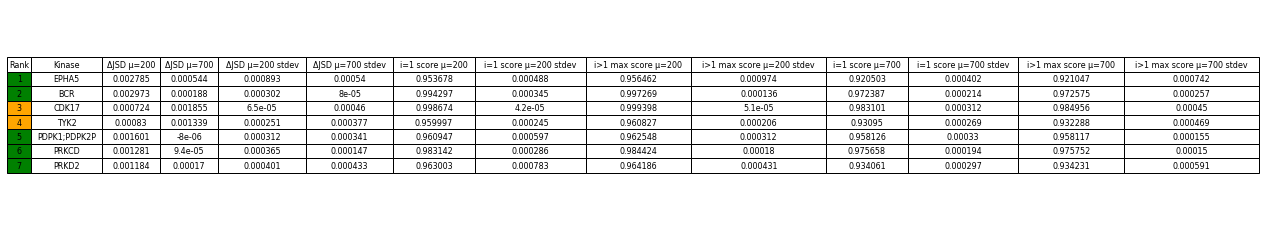

In [9]:
#Who are the kinases that showed statistically significant improvement?

n700 = 0
n200 = 0
both = 0

res = []
for i in range(0, len(final_kinases)):
    k = final_kinases[i]
    mu200 = final_x[i]
    mu700 = final_y[i]
    tscore = mu200+mu700
    std200 = final_std_200[i]
    std700 = final_std_700[i]
    #original scores
    i1_200_score = final_JSD_200_i1[i]
    max_200_score = final_JSD_200_max[i]
    i1_200_score_stdev = final_JSD_200_i1_stdev[i]
    max_200_score_stdev = final_JSD_200_max_stdev[i]
    i1_700_score = final_JSD_700_i1[i]
    max_700_score = final_JSD_700_max[i]
    i1_700_score_stdev = final_JSD_700_i1_stdev[i]
    max_700_score_stdev = final_JSD_700_max_stdev[i]
    if mu200 == 0:
        mu200 = 'N/A'
    if mu700 == 0:
        mu700 = 'N/A'
    sig = sum_sig[i]
    if sig>=1:
        scolor = 'w'
        if sig == 1:
            n200 += 1
            scolor = 'green'
        if sig == 2:
            n700 += 1
            scolor = 'orange'
        if sig == 3:
            both += 1
            scolor = 'steelblue'
        res.append((tscore,k,mu200,mu700,std200,std700,
                    i1_200_score,i1_200_score_stdev,max_200_score,max_200_score_stdev,
                    i1_700_score,i1_700_score_stdev,max_700_score,max_700_score_stdev,scolor))
            
tabled = []
cell_color = []
tabled.append(['Rank','Kinase','ΔJSD μ=200','ΔJSD μ=700','ΔJSD μ=200 stdev', 'ΔJSD μ=700 stdev',
               'i=1 score μ=200','i=1 score μ=200 stdev','i>1 max score μ=200','i>1 max score μ=200 stdev',
               'i=1 score μ=700','i=1 score μ=700 stdev','i>1 max score μ=700','i>1 max score μ=700 stdev'])
cell_color.append(['w','w','w','w','w','w','w','w','w','w','w','w','w','w'])


            
print('average 200 i=1 score:' + str(np.mean(mu200)))
print('average 700 i=1 score:' + str(np.mean(mu700)))
print(n700,n200,both)
res = sorted(res, key=lambda x: x[0], reverse=True)
print('kinase','ΔJSD_μ=200','ΔJSD_μ=700')
counter = 1
for k in res:
    tabled.append([counter,k[1],round(k[2], 6),round(k[3],6),round(k[4],6),round(k[5],6),
                  round(k[6],6), round(k[7],6), round(k[8],6), round(k[9],6),
                  round(k[10],6), round(k[11],6), round(k[12],6), round(k[13],6)])
    #if k[2] > 0.001 or k[3]>0.001:
    color_val = k[14]
    cell_color.append([color_val,'w','w','w','w','w','w','w','w','w','w','w','w','w'])
    #else:
    #cell_color.append(['w','w','w','w','w','w','w','w','w','w','w','w','w','w'])
    #print(counter,k[1],k[2],k[3])
    counter+=1
    
fig, ax = plt.subplots()
table = ax.table(cellText=tabled, loc='center',cellLoc='center',cellColours=cell_color)
table.auto_set_font_size(False)
table.auto_set_column_width(col=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
table.set_fontsize(8)
table.scale(1,1.2)
ax.axis('off')
plt.show()
#fig.savefig("012522_Klaeger_JSD_700v200_improvement_table-newcolors.pdf", bbox_inches='tight',dpi=1000)

1710
5
1710
5
1710
5
1710
5
1710
5
1710
5
1710
5


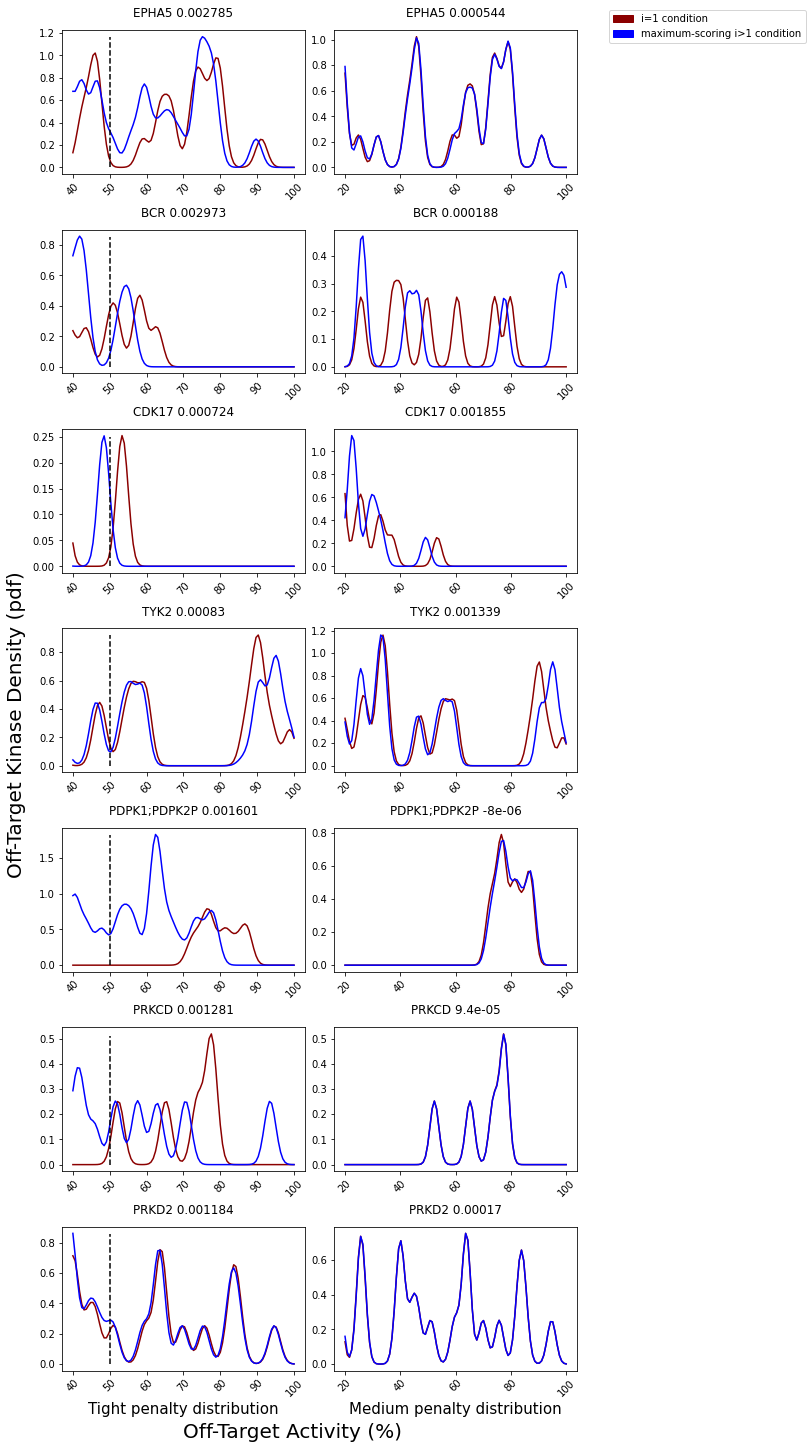

In [10]:
from scipy.stats import norm

#Lets make a plot for each of these tracking the change in off-target activity and the number of off-target kinases
#We need to get all 5 groups of off-target values, and then average the 5 lists at each relative position
#Then we can plot the number of off-target kinases (+/- std for the 5 replicates) for the i=1 versus i>1 conditions

nrows = 7
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(8,20),constrained_layout=True)

fig.supxlabel('Off-Target Activity (%)', fontsize=20)
fig.supylabel('Off-Target Kinase Density (pdf)', fontsize=20)

i1_patch = mpatches.Patch(color='darkred', label='i=1 condition')
max_patch = mpatches.Patch(color='b', label='maximum-scoring i>1 condition')

fig.legend(handles=[i1_patch,max_patch],bbox_to_anchor=(1.4, 1))

axes[(nrows-1)][0].set_xlabel('Tight penalty distribution',fontsize=15)
axes[(nrows-1)][1].set_xlabel('Medium penalty distribution',fontsize=15)

for i in range(0, nrows):
    k = res[i][1]
    score200 = res[i][2]
    score700 = res[i][3]
    
    index = final_kinases.index(k)
    
    off_target_200_i1_init = final_i1_200_off_target_values[index]
    off_target_700_i1_init = final_i1_700_off_target_values[index]
    
    off_target_200_max_init = final_200_off_target_values[index]
    off_target_700_max_init = final_700_off_target_values[index]
    
    ot_200_max = []
    ot_700_max = []
    i1_200 = []
    i1_700 = []
    
    counter = 0
    
    for temp in off_target_200_max_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        ot_200_max+=vals
        counter += 1
        
    for temp in off_target_700_max_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        ot_700_max+=vals
        
    for temp in off_target_200_i1_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        i1_200+=vals
        
    for temp in off_target_700_i1_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        i1_700+=vals
        
    #print('num replicates: ', (len(print('num replicates: ', (len(i1_scores)/99), 
    #          " represents improvement for these many kinases: ", (len(i1_scores)/99)/15)
    #    normfactor = (len(i1_scores)/99)/15)/99)
     
    #there are 2025 off-target scores in each distribution - this represents the off-target activity 
    # for 405 off-targets, for 5 replicates of the on-target kinase.
    #therefore, to get the average off-target effects, we divide the sum of the pdf by 5.
    print(len(ot_200_max))
    print(counter)
    normfactor = 5
    
    #take avg_i1_200 and convert it into a density estimate
    x_d_tight = np.linspace(40, 100, 100)
    x_d_medium = np.linspace(20, 100, 100)
    
    density_i1_tight = sum(norm(xi,scale=1.581).pdf(x_d_tight)/normfactor for xi in i1_200)
    density_imax_tight = sum(norm(xi,scale=1.581).pdf(x_d_tight)/normfactor for xi in ot_200_max)
    
    density_i1_medium = sum(norm(xi,scale=1.581).pdf(x_d_medium)/normfactor for xi in i1_700)
    density_imax_medium = sum(norm(xi,scale=1.581).pdf(x_d_medium)/normfactor for xi in ot_700_max)
    
    axes[i][0].set_title(k+' '+str(round(score200,6)), x=0.5, y=1.05)
    axes[i][1].set_title(k+' '+str(round(score700,6)), x=0.5, y=1.05)
        
    axes[i][0].plot(x_d_tight, density_i1_tight, color='darkred')
    axes[i][0].plot(x_d_tight, density_imax_tight, color='blue')
    axes[i][0].tick_params(axis='x', labelsize=10, rotation=45)
    
    ylim = max(max(density_i1_tight),max(density_imax_tight))
        
    thresh1 = np.arange(0,ylim,0.01)
    xlim = [50]*len(thresh1)
    axes[i][0].plot(xlim,thresh1,'k--')
    
    axes[i][1].plot(x_d_medium, density_i1_medium, color='darkred')
    axes[i][1].plot(x_d_medium, density_imax_medium, color='blue')
    axes[i][1].tick_params(axis='x', labelsize=10, rotation=45)
    
fig.savefig("012622_Klaeger_JSD_700v200_kinase-specific-plots-curves.pdf", bbox_inches='tight',dpi=1000)

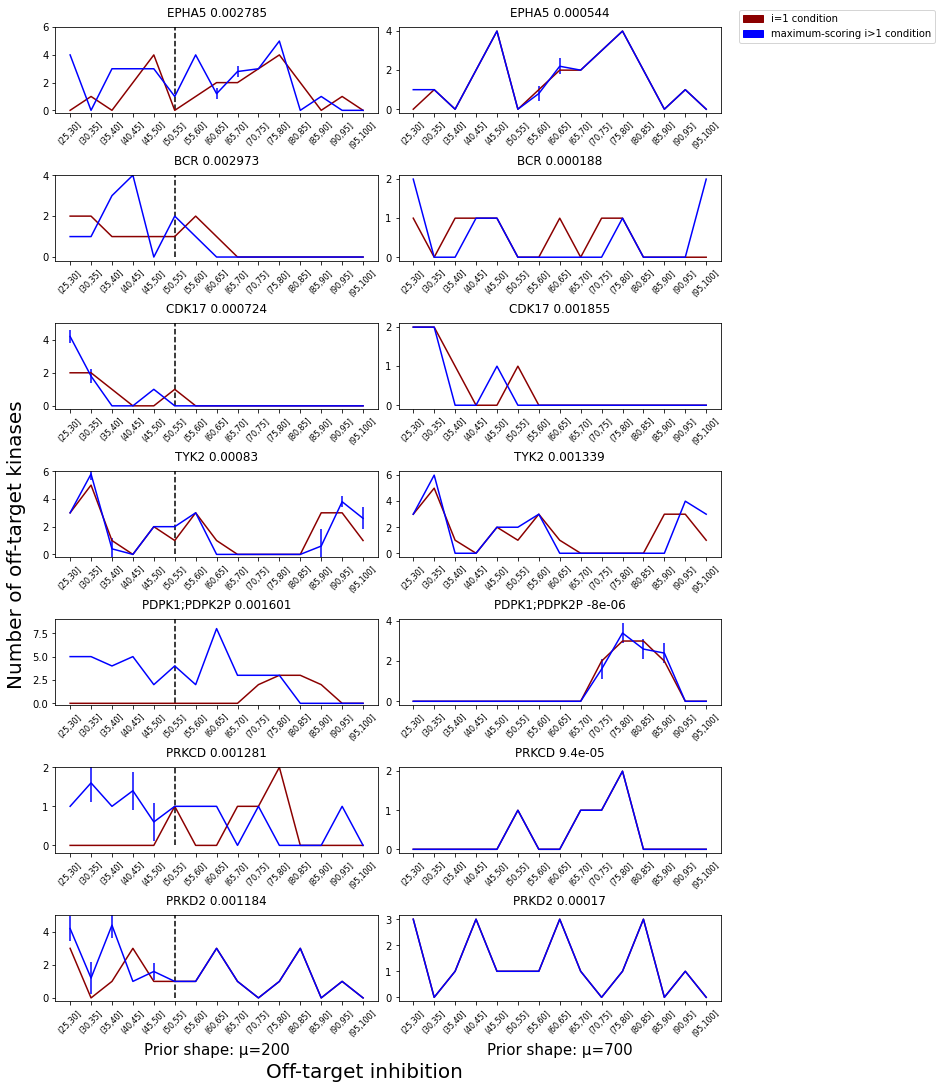

In [11]:
#Lets make a plot for each of these tracking the change in off-target activity and the number of off-target kinases
#We need to get all 5 groups of off-target values, and then average the 5 lists at each relative position
#Then we can plot the number of off-target kinases (+/- std for the 5 replicates) for the i=1 versus i>1 conditions

nrows = 7
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(10,15),constrained_layout=True)

fig.supxlabel('Off-target inhibition', fontsize=20)
fig.supylabel('Number of off-target kinases', fontsize=20)

i1_patch = mpatches.Patch(color='darkred', label='i=1 condition')
max_patch = mpatches.Patch(color='b', label='maximum-scoring i>1 condition')

fig.legend(handles=[i1_patch,max_patch],bbox_to_anchor=(1.3, 1))

axes[nrows-1][0].set_xlabel('Prior shape: μ=200',fontsize=15)
axes[nrows-1][1].set_xlabel('Prior shape: μ=700',fontsize=15)

for i in range(0, nrows):
    k = res[i][1]
    score200 = res[i][2]
    score700 = res[i][3]
    
    index = final_kinases.index(k)
    
    off_target_200_i1_init = final_i1_200_off_target_values[index]
    off_target_700_i1_init = final_i1_700_off_target_values[index]
    
    off_target_200_max_init = final_200_off_target_values[index]
    off_target_700_max_init = final_700_off_target_values[index]
    
    ot_200_max = []
    ot_700_max = []
    i1_200 = []
    i1_700 = []
    
    for temp in off_target_200_max_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        ot_200_max.append(vals)
        
    for temp in off_target_700_max_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        ot_700_max.append(vals)
        
    for temp in off_target_200_i1_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        i1_200.append(vals)
        
    for temp in off_target_700_i1_init:
        vals = (temp[1:-1]).split(', ')
        vals = [float(x) for x in vals]
        i1_700.append(vals)
        
    #for each of the 5 technical replicates, construct bins for each
    #afterwards, we will average (an get the std) for each of the frequencies over the 5 technical replicates
    
    #print(i1_200)
    
    i1_200_binned = []
    
    for replicate in i1_200:
        bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
        for x in range(0, len(replicate)): #for every point in the set of sample noise (100 per measrument), add it to the distribution
            temp = int(replicate[x]/5)
            if temp < 20 and temp >= 0:
                bins[temp] += 1.0
            elif temp >= 20:
                bins[len(bins)-1] += 1.0
            else:
                bins[0] += 1.0
        i1_200_binned.append(bins)
        
    i1_700_binned = []
    
    for replicate in i1_700:
        bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
        for x in range(0, len(replicate)): #for every point in the set of sample noise (100 per measrument), add it to the distribution
            temp = int(replicate[x]/5)
            if temp < 20 and temp >= 0:
                bins[temp] += 1.0
            elif temp >= 20:
                bins[len(bins)-1] += 1.0
            else:
                bins[0] += 1.0
        i1_700_binned.append(bins)
        
        
    max_200_binned = []
    
    for replicate in ot_200_max:
        bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
        for x in range(0, len(replicate)): #for every point in the set of sample noise (100 per measrument), add it to the distribution
            temp = int(replicate[x]/5)
            if temp < 20 and temp >= 0:
                bins[temp] += 1.0
            elif temp >= 20:
                bins[len(bins)-1] += 1.0
            else:
                bins[0] += 1.0
        max_200_binned.append(bins)
        
    max_700_binned = []
    
    for replicate in ot_700_max:
        bins = [0 for i in range(0,20)] #bin size=5 for the final off-target distribution
        for x in range(0, len(replicate)): #for every point in the set of sample noise (100 per measrument), add it to the distribution
            temp = int(replicate[x]/5)
            if temp < 20 and temp >= 0:
                bins[temp] += 1.0
            elif temp >= 20:
                bins[len(bins)-1] += 1.0
            else:
                bins[0] += 1.0
        max_700_binned.append(bins)
        
    avg_i1_200=list(np.average(i1_200_binned, axis=0))
    std_i1_200=list(np.std(i1_200_binned, axis=0))
    
    avg_i1_700=list(np.average(i1_700_binned, axis=0))
    std_i1_700=list(np.std(i1_700_binned, axis=0))
    
    avg_max_200=list(np.average(max_200_binned, axis=0))
    std_max_200=list(np.std(max_200_binned, axis=0))
    
    avg_max_700=list(np.average(max_700_binned, axis=0))
    std_max_700=list(np.std(max_700_binned, axis=0))
    
    bin_max = ['0','(0,5)', '(5,10]', '(10,15]', '(15,20]', '(25,30]',
               '(30,35]', '(35,40]', '(40,45]', '(45,50]', '(50,55]',
               '(55,60]', '(60,65]', '(65,70]', '(70,75]', '(75,80]',
               '(80,85]', '(85,90]', '(90,95]', '(95,100]']
    
    #only plot from 20 upwards
    bin_max_200 = bin_max[5:]
    avg_i1_200 = avg_i1_200[5:]
    std_i1_200 = std_i1_200[5:]
    avg_max_200 = avg_max_200[5:]
    std_max_200 = std_max_200[5:]
    
    bin_max_700 = bin_max[5:]
    avg_i1_700 = avg_i1_700[5:]
    std_i1_700 = std_i1_700[5:]
    avg_max_700 = avg_max_700[5:]
    std_max_700 = std_max_700[5:]
    
    ylim200_a = max(avg_i1_200)
    ylim200_b = max(avg_max_200)
    ylim_200 = max([ylim200_a,ylim200_b])
    
    axes[i][0].errorbar(bin_max_200, avg_i1_200, yerr=std_i1_200,xerr=None, color='darkred')
    axes[i][0].errorbar(bin_max_200, avg_max_200, yerr=std_max_200,xerr=None, color='blue')
    axes[i][0].set_title(k+' '+str(round(score200,6)), x=0.5, y=1.05)
    axes[i][0].tick_params(axis='x', labelsize=8, rotation=45)
    
    axes[i][1].errorbar(bin_max_700, avg_i1_700, yerr=std_i1_700,xerr=None, color='darkred')
    axes[i][1].errorbar(bin_max_700, avg_max_700, yerr=std_max_700,xerr=None, color='blue')
    axes[i][1].set_title(k+' '+str(round(score700,6)), x=0.5, y=1.05)
    axes[i][1].tick_params(axis='x', labelsize=8, rotation=45)
    
    #add a vertical line to represent where the on-target prior becomes innefectual in either
    thresh1 = np.arange(0,int(ylim_200*1.2),0.01)
    xlim = [5]*len(thresh1)
    axes[i][0].plot(xlim,thresh1,'k--')
    axes[i][0].set_ylim((-0.2,int(ylim_200*1.2)))
    
    #axes[i][0].set_ylim(0, 10)
    #axes[i][1].set_ylim(0, 10)
        
    #now we need to 
    
fig.savefig("011322_Klaeger_JSD_700v200_kinase-specific-plots.pdf", bbox_inches='tight',dpi=1000)